In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = np.dot(w,x[i]) + b

        cost += (f_wb - y[i]) ** 2
    
    cost *= 1/(2*m)

    return cost

In [4]:
def compute_gradient(x, y, w, b):

    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * x[i, j]
        
        dj_db = f_wb - y[i]
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, epoch):

    w = copy.deepcopy(w_in)
    b = b_in
    j_history = []

    for i in range(epoch):

        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i < 10000:
            j_history.append(compute_cost(x,y,w,b))
        
        if i% math.ceil(epoch/10) == 0:

            print(f"Epoch: {i:4}: Cost: {j_history[-1]:0.3e} ")
    
    return w, b, j_history


In [6]:
w_initial = np.zeros(x_train.shape[1])
b_initial = 0
alpha = 5e-7
epoch = 100000

w_final, b_final, j_hist = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, epoch)

print(f"(w,b) found by gradient descent: w: {w_final}; b: {b_final:8.4f}")

m = x_train.shape[0]

for i in range(m):

    print(f"Predicted value: {np.dot(w_final, x_train[i]) + b_final}; Target value: {y_train[i]}")

Epoch:    0: Cost: 2.529e+03 
Epoch: 10000: Cost: 6.249e+02 
Epoch: 20000: Cost: 6.249e+02 
Epoch: 30000: Cost: 6.249e+02 
Epoch: 40000: Cost: 6.249e+02 
Epoch: 50000: Cost: 6.249e+02 
Epoch: 60000: Cost: 6.249e+02 
Epoch: 70000: Cost: 6.249e+02 
Epoch: 80000: Cost: 6.249e+02 
Epoch: 90000: Cost: 6.249e+02 
(w,b) found by gradient descent: w: [ 0.24227182  0.28827583 -0.85573297 -1.58750002]; b:   0.3762
Predicted value: 439.26425844282704; Target value: 460
Predicted value: 279.086461866186; Target value: 232
Predicted value: 150.95011273369659; Target value: 178


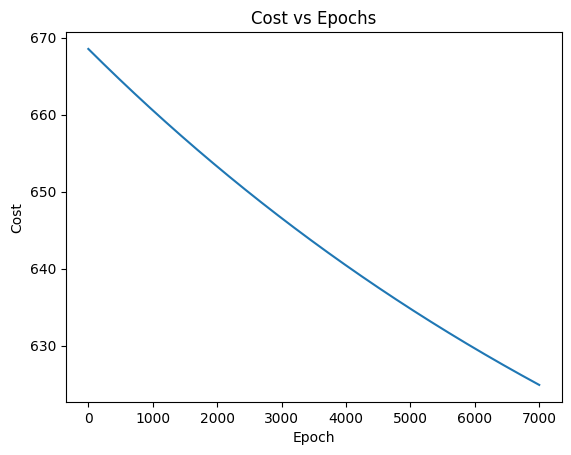

In [24]:
plt.plot(j_hist[3000:])
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()